# Exercise 1

## 1. Explore the dataset

In [2]:
# Load MNIST from sklearn

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

c:\Users\faguilera\miniconda3\envs\ml\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X = X.values
y = y.values

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
from matplotlib import pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.scatter(14, 14, c='red')
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")

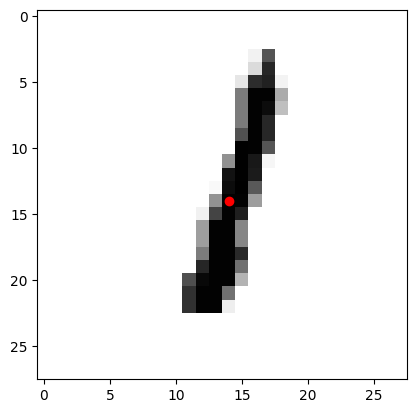

In [5]:
import numpy as np
rand_digit_index = np.random.randint(0, len(X))
plot_digit(X[rand_digit_index])

In [6]:
y[rand_digit_index]

'1'

## 2. Split into training and test sets. Stratified by label

In [7]:
# Split the data into train and test equally
# There must be same proportion of each digit in train and test

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
# Lengths
print(len(X_train))
print(len(X_test))

60000
10000


In [58]:
def print_proportions(y):
    for i in range(10):
        print("Proportion of", i, ":", len(y[y == str(i)]) / len(y))

print_proportions(y_train)
print_proportions(y_test)

Proportion of 0 : 0.09871666666666666
Proportion of 1 : 0.11236666666666667
Proportion of 2 : 0.0993
Proportion of 3 : 0.10218333333333333
Proportion of 4 : 0.09736666666666667
Proportion of 5 : 0.09035
Proportion of 6 : 0.09863333333333334
Proportion of 7 : 0.10441666666666667
Proportion of 8 : 0.09751666666666667
Proportion of 9 : 0.09915
Proportion of 0 : 0.098
Proportion of 1 : 0.1135
Proportion of 2 : 0.1032
Proportion of 3 : 0.101
Proportion of 4 : 0.0982
Proportion of 5 : 0.0892
Proportion of 6 : 0.0958
Proportion of 7 : 0.1028
Proportion of 8 : 0.0974
Proportion of 9 : 0.1009


## 3. Pipeline steps

In [59]:
from sklearn.pipeline import Pipeline

mnist_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

x_prepared = mnist_pipeline.fit_transform(X_train)

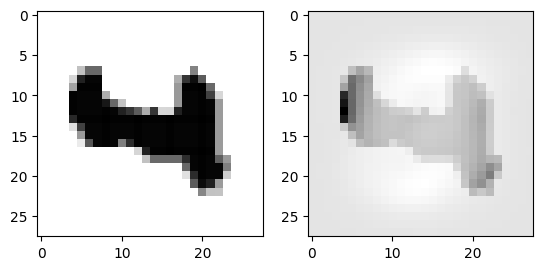

In [38]:
plot_centered(X_train, x_prepared)

## 4. Train model: KNeighborsClassifier

In [41]:
# KNeighborsClassifier param grid search.

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

param_grid = [
    {'n_neighbors': [3, 15, 20], 'weights': ['uniform', 'distance']}
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(x_prepared, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 15, 20],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [42]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [43]:
# Save model in a pkl
import joblib

joblib.dump(grid_search.best_estimator_, "mnist_knn.pkl")


['mnist_knn.pkl']

## 5. Measure performance

In [44]:
# Performance with best params with cross validation
from sklearn.model_selection import cross_val_score
    
best_model = grid_search.best_estimator_
cross_val_score(best_model, x_prepared, y_train, cv=3, scoring='accuracy', verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished


array([0.9398, 0.942 , 0.9429])

In [45]:
# Measure performance on test set
x_test_prepared = mnist_pipeline.transform(X_test)
best_model.score(x_test_prepared, y_test)

# Measure performance on test set with cross validation
cross_val_score(best_model, x_test_prepared, y_test, cv=3, scoring='accuracy', verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.7s finished


array([0.87762448, 0.90789079, 0.92319232])

### Precision and recall

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = best_model.predict(x_test_prepared)
confusion_matrix(y_test, y_pred)

array([[ 966,    0,    0,    4,    1,    4,    5,    0,    0,    0],
       [   0, 1126,    3,    1,    1,    0,    3,    0,    1,    0],
       [  12,    4,  968,   16,    4,    0,    5,   11,    9,    3],
       [   0,    3,    4,  959,    1,   15,    1,   13,    9,    5],
       [   1,    9,    4,    2,  922,    2,    7,    5,    3,   27],
       [   5,    0,    3,   21,    4,  829,   10,    2,   10,    8],
       [  10,    4,    2,    1,    3,    8,  928,    0,    2,    0],
       [   0,   19,   13,    3,    5,    2,    0,  955,    1,   30],
       [  13,    1,    5,   19,    9,   24,    3,    7,  886,    7],
       [   4,    4,    5,   11,   15,    7,    0,   29,    4,  930]],
      dtype=int64)

In [47]:
print("Model precision:", precision_score(y_test, y_pred, average="macro"))
print("Model recall:", recall_score(y_test, y_pred, average="macro"))

Model precision: 0.9467521736903584
Model recall: 0.9462575286756956


In [48]:
y_scores = best_model.predict_proba(x_test_prepared)

### Precision and recall per each class

In [49]:
def get_precision_recall(y_test, y_scores):
    precisions = []
    recalls = []
    for i in range(10):
        y_test_i = (y_test == str(i))
        y_scores_i = y_scores[:, i]
        precisions.append(precision_score(y_test_i, y_scores_i.round(), average="macro"))
        recalls.append(recall_score(y_test_i, y_scores_i.round(), average="macro"))
    return precisions, recalls

precisions, recalls = get_precision_recall(y_test, y_scores)

for i in range(10):
    print(f"Class {i}: precision {precisions[i]}, recall {recalls[i]}")

Class 0: precision 0.9772077499094243, recall 0.9888875062220011
Class 1: precision 0.9819241372158294, recall 0.9937227775417359
Class 2: precision 0.9768886243312855, recall 0.9625131388779398
Class 3: precision 0.9651614459203371, recall 0.9696521988127622
Class 4: precision 0.9768141748879136, recall 0.9668340395470656
Class 5: precision 0.9668577270894319, recall 0.9607103891321087
Class 6: precision 0.9815290186044343, recall 0.9815290186044343
Class 7: precision 0.9642741952447396, recall 0.9594683676496354
Class 8: precision 0.9757781929604571, recall 0.9467818499238567
Class 9: precision 0.9593177690640111, recall 0.9548661644796432


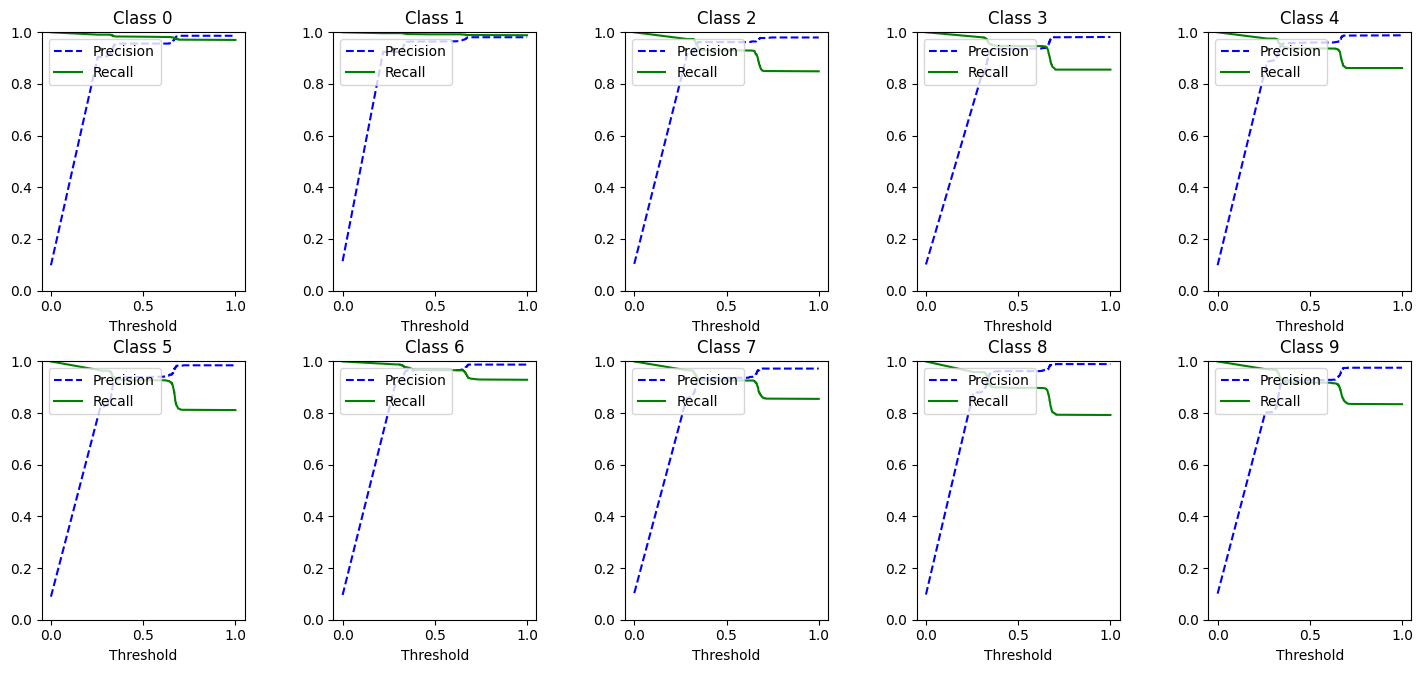

In [50]:
# Plot the precision recall curve for each class
# 2 cols, 5 rows
# Give enough space for the legend 

from sklearn.metrics import precision_recall_curve

def plot_precision_recall_threshold(y_test, y_pred):
    fig, axs = plt.subplots(2, 5)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    fig.tight_layout(pad=3.0)
    for i in range(10):
        precisions, recalls, thresholds = precision_recall_curve(y_test == str(i), y_pred[:, i])
        axs[i // 5][i % 5].plot(thresholds, precisions[:-1], "b--", label="Precision")
        axs[i // 5][i % 5].plot(thresholds, recalls[:-1], "g-", label="Recall")
        axs[i // 5][i % 5].set_title(f"Class {i}")
        axs[i // 5][i % 5].set_xlabel("Threshold")
        axs[i // 5][i % 5].legend(loc="upper left")
        axs[i // 5][i % 5].set_ylim([0, 1])

plot_precision_recall_threshold(y_test, y_scores)

### Plot precision vs recall

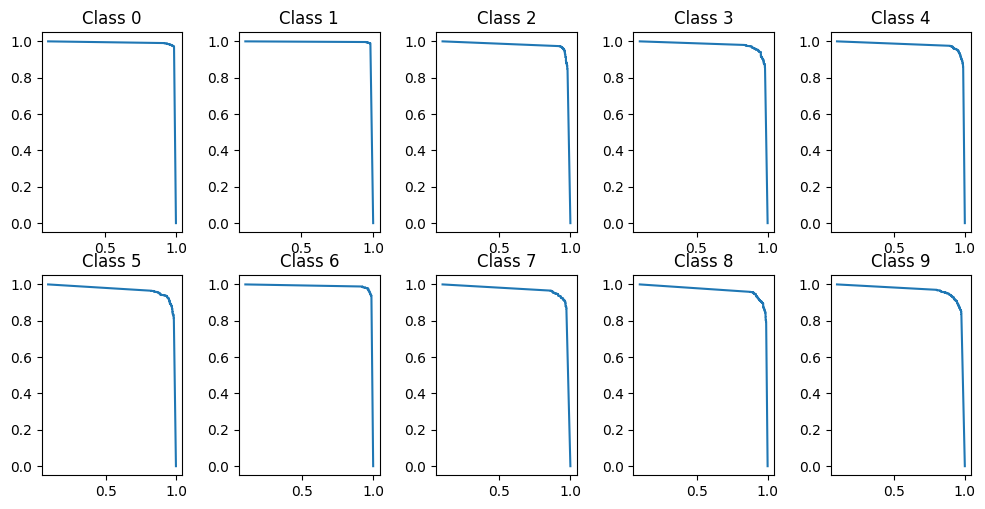

In [51]:
# Plot precision vs recall for each class
# Plot 2 rows of 5 cols, of 3x3 each subplot

def plot_pres_recall_multiclass(y_test, y_scores):
    fig, axs = plt.subplots(2, 5)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    fig.tight_layout(pad=1.0)
    for i in range(10):
        precisions, recalls, thresholds = precision_recall_curve(y_test == str(i), y_scores[:, i])
        # plot each subplot to 3x3 size
        axs[int(i / 5)][i % 5].plot(precisions, recalls)
        axs[int(i / 5)][i % 5].set_title(f"Class {i}")
    plt.show()
    

plot_pres_recall_multiclass(y_test, y_scores)

### AUC for each class

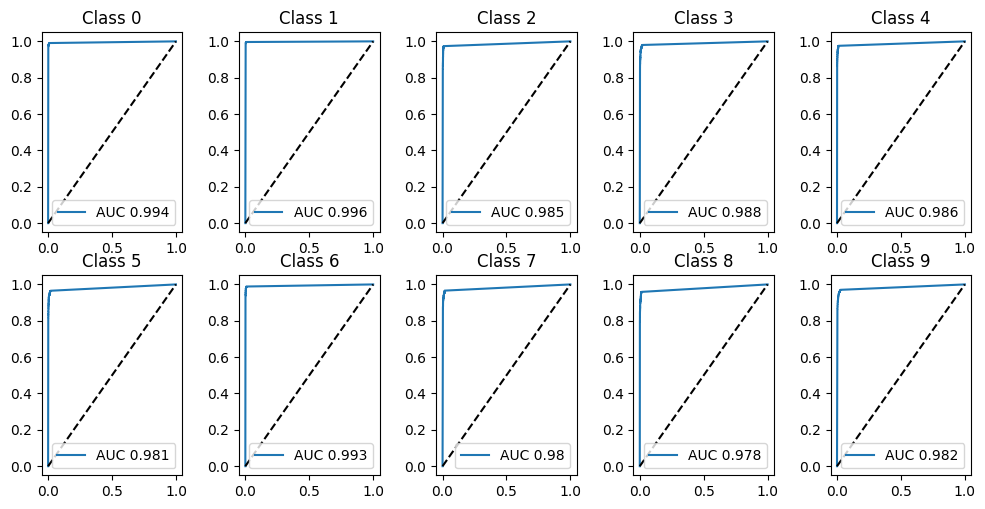

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_AUC_multiclass(y_test, y_scores):
    fig, axs = plt.subplots(2, 5)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    fig.tight_layout(pad=1.0)
    for i in range(10):
        auc = roc_auc_score(y_test == str(i), y_scores[:, i])
        auc = int(auc * 1000) / 1000
        fpr, tpr, thresholds = roc_curve(y_test == str(i), y_scores[:, i])
        axs[int(i / 5)][i % 5].plot(fpr, tpr, label=f"AUC {auc}")
        axs[int(i / 5)][i % 5].set_title(f"Class {i}")
        axs[int(i / 5)][i % 5].legend(loc="lower right")
        axs[int(i / 5)][i % 5].plot([0, 1], [0, 1], 'k--')
    plt.show()

plot_AUC_multiclass(y_test, y_scores)

### Tradeoff for precision > 0.97

In [53]:
def get_recall_for_precision(y_test, y_scores, precision):
    min_recalls = []
    min_precisions = []
    for i in range(10):
        precisions, recalls, thresholds = precision_recall_curve(y_test == str(i), y_scores[:, i])
        min_recalls.append(recalls[np.argmax(precisions >= precision)])
        min_precisions.append(precisions[np.argmax(precisions >= precision)])
    return min_recalls, min_precisions

recs, pres = get_recall_for_precision(y_test, y_scores, 0.97)

for i in range(10):
    print(f"Class {i}: recall {recs[i]}, precision {pres[i]}")

Class 0: recall 0.9785714285714285, precision 0.9706477732793523
Class 1: recall 0.9911894273127754, precision 0.9706643658326143
Class 2: recall 0.8905038759689923, precision 0.9704329461457233
Class 3: recall 0.897029702970297, precision 0.9700214132762313
Class 4: recall 0.9144602851323829, precision 0.9708108108108108
Class 5: recall 0.8822869955156951, precision 0.9704069050554871
Class 6: recall 0.964509394572025, precision 0.9705882352941176
Class 7: recall 0.8754863813229572, precision 0.970873786407767
Class 8: recall 0.8747433264887063, precision 0.9703872437357631
Class 9: recall 0.8602576808721506, precision 0.970917225950783


### Error analysis

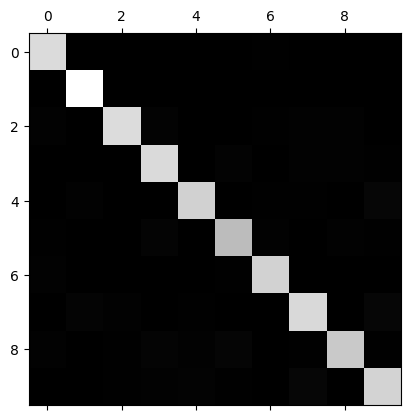

In [54]:
conf_mx = confusion_matrix(y_test, y_pred)

# PLot confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)

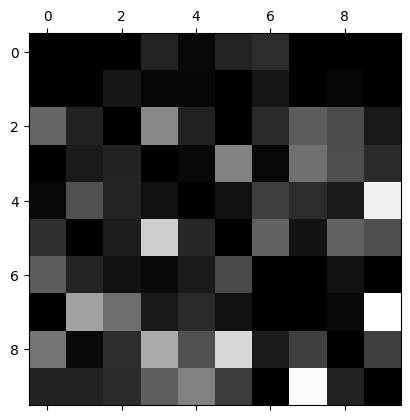

In [55]:
# Normalize confusion matrix and fill diagonal
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

# Plot normalized confusion matrix
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

We can see that the overall clasification is good and errors are sparse. 

Rows are actual classes and cols are predictions. We see that 2 gets missclassified as 7. Same with 4 as 9

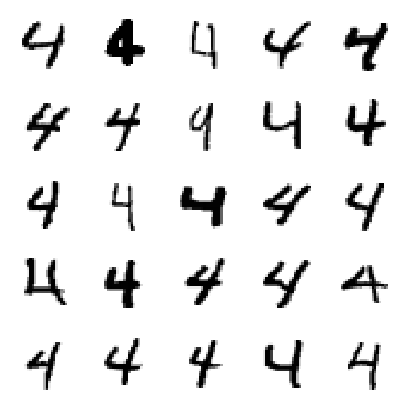

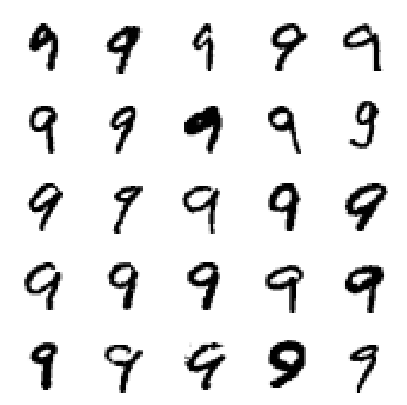

In [56]:
# Plot 5x5 random digits from the same class

def plot_25(digit, X, y):
    fig, axs = plt.subplots(5, 5)
    fig.set_figheight(5)
    fig.set_figwidth(5)
    for i in range(5):
        for j in range(5):
            rand_idx = np.random.randint(0, len(X))
            while y[rand_idx] != str(digit):
                rand_idx = np.random.randint(0, len(X))
            axs[i][j].imshow(X[rand_idx].reshape(28, 28), cmap = plt.cm.binary,
                    interpolation="nearest")
            axs[i][j].axis('off')

plot_25(4, X_test, y_test)
plot_25(9, X_test, y_test)

In [57]:
# Save precission of overall model and each class

f1_no_shift = f1_score(y_test, y_pred, average="macro")

f1_no_shift

0.9463575507139191

# Exercise 2 - Shift in every direction

In [83]:
X_shifted = []
y_shifted = []

In [84]:
from tqdm import tqdm

for i in tqdm(range(len(X_train))):
    X_shifted.append(np.roll(X_train[i], -4))
    y_shifted.append(y_train[i])
    
    X_shifted.append(np.roll(X_train[i], 4))
    y_shifted.append(y_train[i])

    X_shifted.append(np.roll(X_train[i], -4 * 28))
    y_shifted.append(y_train[i])

    X_shifted.append(np.roll(X_train[i], 4 * 28))
    y_shifted.append(y_train[i])

X_shifted = np.array(X_shifted)
y_shifted = np.array(y_shifted)

# Print length of X_shifted and y_shifted
print(len(X_shifted))
print(len(y_shifted))

100%|██████████| 60000/60000 [00:10<00:00, 5975.39it/s]


240000
240000


In [85]:
# Stratified train test split by y
from sklearn.model_selection import train_test_split

X_train_shifted, X_test_shifted, y_train_shifted, y_test_shifted = train_test_split(X_shifted, y_shifted, test_size=0.2, stratify=y_shifted)

# Print lengths of train and test
print(len(X_train_shifted))
print(len(X_test_shifted))

# Print proportions of each class in train and test
print_proportions(y_train_shifted)
print_proportions(y_test_shifted)

192000
48000
Proportion of 0 : 0.09871875
Proportion of 1 : 0.11236458333333334
Proportion of 2 : 0.09930208333333333
Proportion of 3 : 0.10218229166666666
Proportion of 4 : 0.09736458333333334
Proportion of 5 : 0.09034895833333334
Proportion of 6 : 0.09863541666666667
Proportion of 7 : 0.10441666666666667
Proportion of 8 : 0.097515625
Proportion of 9 : 0.09915104166666666
Proportion of 0 : 0.09870833333333333
Proportion of 1 : 0.112375
Proportion of 2 : 0.09929166666666667
Proportion of 3 : 0.1021875
Proportion of 4 : 0.097375
Proportion of 5 : 0.09035416666666667
Proportion of 6 : 0.098625
Proportion of 7 : 0.10441666666666667
Proportion of 8 : 0.09752083333333333
Proportion of 9 : 0.09914583333333334


In [86]:
# Pass thru pipeline
x_train_shifted_prepared = mnist_pipeline.fit_transform(X_train_shifted)

# Fit model with best params
best_model.fit(x_train_shifted_prepared, y_train_shifted)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [87]:
# Measure performance on test set
x_test_shifted_prepared = mnist_pipeline.transform(X_test_shifted)
best_model.score(x_test_shifted_prepared, y_test_shifted)

# Measure performance on test set with cross validation and f1 score
cross_val_score(best_model, x_test_shifted_prepared, y_test_shifted, cv=3, scoring='f1_macro', verbose=10, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished


array([0.91219423, 0.9107677 , 0.91403783])

In [88]:
# Get the f1 score
y_pred_shifted = best_model.predict(x_test_shifted_prepared)
f1_shifted = f1_score(y_test_shifted, y_pred_shifted, average="macro")

f1_shifted